# Airline Sentiment Analysis:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report

In [98]:
df = pd.read_csv("airline_tweets.csv")

In [99]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [101]:
df["airline"].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

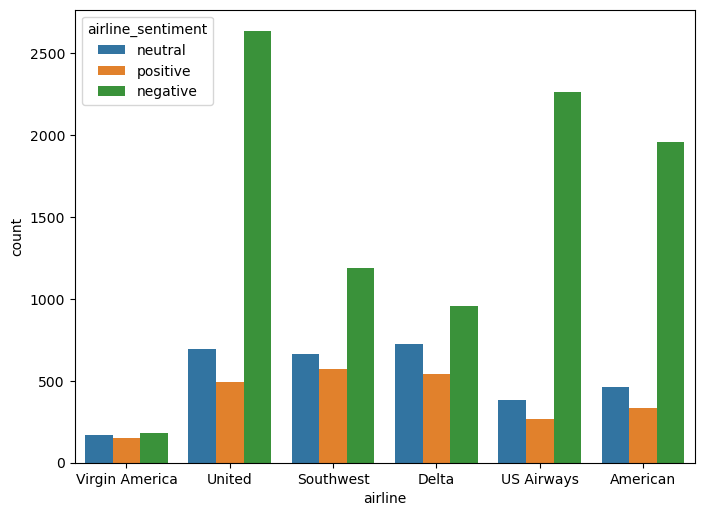

In [102]:
plt.figure(figsize=(8,6), dpi= 100)

sns.countplot(data=df, x= "airline", hue= "airline_sentiment")

plt.show()

In [103]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [104]:
# We are Goint to use Just Tweet Text and Sentiment in Model Building:

new_df = df[["airline_sentiment", "text"]]

In [105]:
new_df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### Train Test Split:

In [106]:
x = df["text"]

In [107]:
y = df["airline_sentiment"]

In [108]:
x.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [109]:
y.head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [111]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11712,)
(2928,)
(11712,)
(2928,)


### TfIdf Vectorization:

In [112]:
tfidf = TfidfVectorizer(stop_words= "english")

In [113]:
x_train_tfidf = tfidf.fit_transform(x_train)

In [114]:
x_test_tfidf = tfidf.transform(x_test)

In [115]:
x_train_tfidf

<11712x12987 sparse matrix of type '<class 'numpy.float64'>'
	with 106745 stored elements in Compressed Sparse Row format>

In [116]:
x_test_tfidf

<2928x12987 sparse matrix of type '<class 'numpy.float64'>'
	with 25293 stored elements in Compressed Sparse Row format>

### Model:

In [117]:
nb_model = MultinomialNB()

In [118]:
nb_model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [119]:
pred = nb_model.predict(x_test_tfidf)

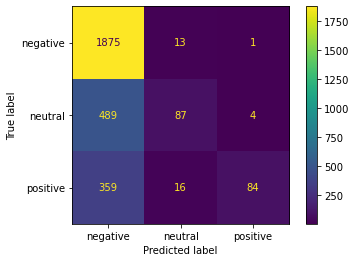

In [121]:
plot_confusion_matrix(nb_model, x_test_tfidf, y_test)
plt.show()

In [122]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.15      0.25       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.70      2928
   macro avg       0.79      0.44      0.46      2928
weighted avg       0.74      0.70      0.62      2928



In [125]:
log_model = LogisticRegression(max_iter= 1000)

In [126]:
log_model.fit(x_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [127]:
pred = log_model.predict(x_test_tfidf)

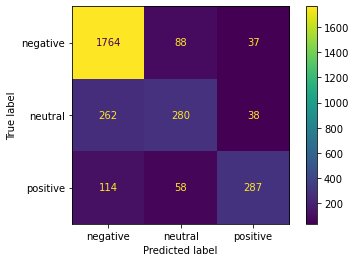

In [128]:
plot_confusion_matrix(log_model, x_test_tfidf, y_test)
plt.show()

In [129]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.66      0.48      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928

